In [18]:
import numpy as np
import pandas as pd

In [19]:
import sklearn as sk

In [20]:
# !which jupyter
import sys
print(sys.version)
import pmdarima

3.11.7 (main, Dec 15 2023, 12:09:56) [Clang 14.0.6 ]


In [21]:
# import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
from pandas import read_csv
 
d = read_csv("Nat_Gas.csv")
 
df = d.values
print(d)

       Dates  Prices
0   10/31/20   10.10
1   11/30/20   10.30
2   12/31/20   11.00
3    1/31/21   10.90
4    2/28/21   10.90
5    3/31/21   10.90
6    4/30/21   10.40
7    5/31/21    9.84
8    6/30/21   10.00
9    7/31/21   10.10
10   8/31/21   10.30
11   9/30/21   10.20
12  10/31/21   10.10
13  11/30/21   11.20
14  12/31/21   11.40
15   1/31/22   11.50
16   2/28/22   11.80
17   3/31/22   11.50
18   4/30/22   10.70
19   5/31/22   10.70
20   6/30/22   10.40
21   7/31/22   10.50
22   8/31/22   10.40
23   9/30/22   10.80
24  10/31/22   11.00
25  11/30/22   11.60
26  12/31/22   11.60
27   1/31/23   12.10
28   2/28/23   11.70
29   3/31/23   12.00
30   4/30/23   11.50
31   5/31/23   11.20
32   6/30/23   10.90
33   7/31/23   11.40
34   8/31/23   11.10
35   9/30/23   11.50
36  10/31/23   11.80
37  11/30/23   12.20
38  12/31/23   12.80
39   1/31/24   12.60
40   2/29/24   12.40
41   3/31/24   12.70
42   4/30/24   12.10
43   5/31/24   11.40
44   6/30/24   11.50
45   7/31/24   11.60
46   8/31/24 

In [23]:
from pandas import to_datetime
d['Dates'] = to_datetime(d['Dates'])

<Axes: xlabel='Dates', ylabel='Prices'>

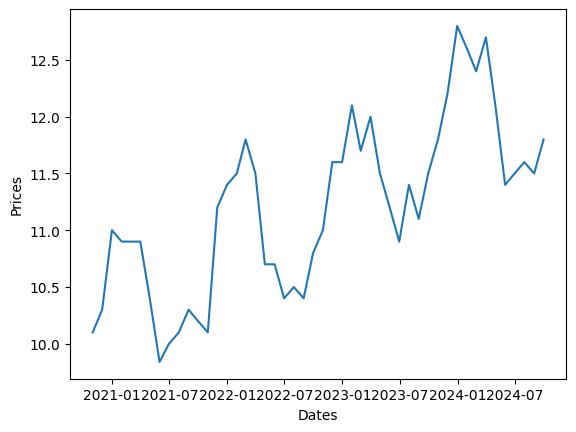

In [24]:

sns.lineplot(x='Dates', y='Prices', data=d)

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose 

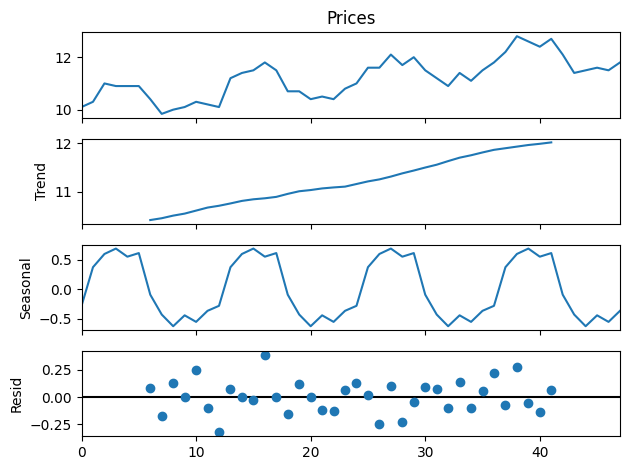

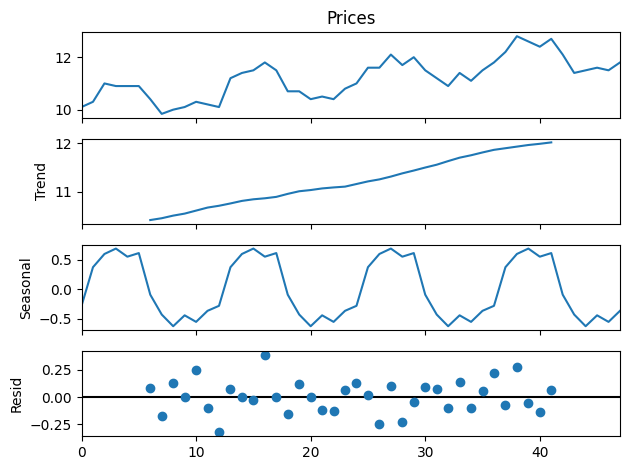

In [28]:
result = seasonal_decompose(d['Prices'],  
                            model ='additive', period = 12) 
  
# ETS plot  
result.plot() 

In [29]:
new_d = result.seasonal

In [30]:
print(new_d)

0    -0.284051
1     0.370671
2     0.594838
3     0.686505
4     0.549005
5     0.610116
6    -0.095162
7    -0.431829
8    -0.629884
9    -0.445162
10   -0.556273
11   -0.368773
12   -0.284051
13    0.370671
14    0.594838
15    0.686505
16    0.549005
17    0.610116
18   -0.095162
19   -0.431829
20   -0.629884
21   -0.445162
22   -0.556273
23   -0.368773
24   -0.284051
25    0.370671
26    0.594838
27    0.686505
28    0.549005
29    0.610116
30   -0.095162
31   -0.431829
32   -0.629884
33   -0.445162
34   -0.556273
35   -0.368773
36   -0.284051
37    0.370671
38    0.594838
39    0.686505
40    0.549005
41    0.610116
42   -0.095162
43   -0.431829
44   -0.629884
45   -0.445162
46   -0.556273
47   -0.368773
Name: seasonal, dtype: float64


In [31]:


from pmdarima import auto_arima 
  
# # Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
  
# # Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(d['Prices'], start_p = 0, start_q = 0, 
                           max_p = 365, max_q = 365, m = 12, 
                           start_P = 0, seasonal = True, 
                           d = None, D = 1, trace = True, 
                           error_action ='ignore',   # we don't want to know if an order does not work 
                           suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)  
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=13.970, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=8.012, Time=0.10 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=68.315, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=15.872, Time=0.02 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=3.100, Time=0.29 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=5.099, Time=0.24 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1.103, Time=0.17 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=7.455, Time=0.05 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=3.103, Time=0.13 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=3.100, Time=0.19 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=5.098, Time=0.40 sec
 A

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                   48
Model:             SARIMAX(2, 1, 0, 12)   Log Likelihood                   3.448
Date:                  Mon, 30 Dec 2024   AIC                              1.103
Time:                          13:11:29   BIC                              7.437
Sample:                               0   HQIC                             3.314
                                   - 48                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.4291      0.141     10.170      0.000       1.154       1.705
ar.S.L12      -0.9315      0.181     -5.139      0.000      -1.287      -0.576
ar.S.L24      -0.7090      0.133     -5.322      0.000      -0.970      -0.448
sigma2         0.0270      0.012      2.201      0.028       0.003       0.051
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 1.87
Prob(Q):                              0.86   Prob(JB):                         0.39
Heteroskedasticity (H):               1.03   Skew:                            -0.37
Prob(H) (two-sided):                  0.95   Kurtosis:                         2.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
# forecast = result.predict(start = (len(d)),  
#                           end = (len(d)-1) +  12,  
#                           typ = 'levels')
  
# # Plot the forecast values 
# d['Prices'].plot(legend = True) 
# forecast.plot(legend = True)


In [33]:
train = d.iloc[:len(d) - 12 ]
test = d.iloc[len(d)-12:] 
  
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train['Prices'],  
                order = (0, 0, 0),  
                seasonal_order =(2, 1, 0, 12)) 
  
result = model.fit() 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27153D+00    |proj g|=  8.31801D+00

At iterate    5    f=  5.18309D-01    |proj g|=  3.14874D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     17      1     0     0   1.449D-06   5.165D-01
  F =  0.51653774050569934     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<Axes: >

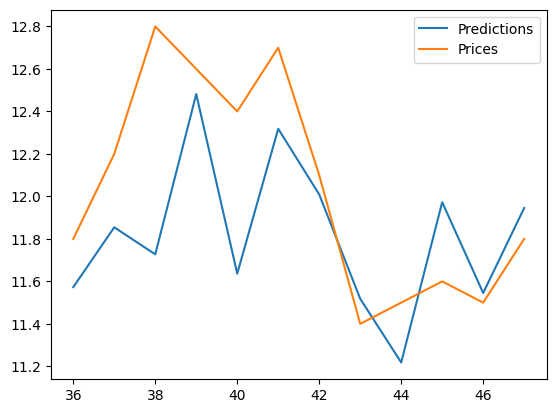

In [39]:
start = 0 
end = len(train) + len(test) - 1

start = len(train)
end = len(d) - 1

# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions.plot(legend=True) 
test['Prices'].plot(legend=True)
# d['Prices'].plot(legend=True)

In [40]:
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 


# Calculate root mean squared error 
print(rmse(test["Prices"], predictions)," , ",
mean_squared_error(test["Prices"], predictions))  


0.4404906036294855  ,  0.19403197188586851


In [ ]:
d.loc[:, ['Prices']] = d.loc[:, ['Prices']].interpolate(method='linear', limit_direction='both', limit=1000)

In [ ]:
forecast

In [ ]:
from pandas import date_range 
from pandas import concat



In [ ]:

df = []
pred = date_range(start='10/31/2024', end='09/30/2025', freq='M')
b = 48
for i in pred:
    df.append([i,forecast[b]])
    b+=1
df = pd.DataFrame(df,columns = d.columns)
d = concat ([d,df])

In [ ]:
d.set_index('Dates',inplace=True)


In [ ]:
def interpolate_daily_prices_from_df(monthly_prices_df):
    daily_dates = pd.date_range(start=monthly_prices_df.index[0], end=monthly_prices_df.index[-1], freq='D')
    daily_prices_df = pd.DataFrame(index=daily_dates)

    for column in monthly_prices_df.columns:
        interpolated_prices = np.interp(
            x=daily_dates.astype(np.int64) // 10**9,  # Convert to Unix timestamp
            xp=monthly_prices_df.index.astype(np.int64) // 10**9,  # Convert to Unix timestamp
            fp=monthly_prices_df[column].values
        )
        daily_prices_df[column] = interpolated_prices

    return daily_prices_df

In [ ]:
d = interpolate_daily_prices_from_df(d)

In [ ]:
d

In [ ]:
from dateutil import parser

def get_price(date):
    date = parser.parse(date)
    return d._get_value(date, 'Prices') 
    

In [ ]:
date = input("Enter date: ")
print(get_price(date))